# Carga de datos

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

def read_file(filename):
    x = pickle._Unpickler(open(filename,'rb'))
    x.encoding = 'latin1'
    p = x.load()
    return p

files = []

#Carga de archivos específicos
for n in range(12,16):
    s = 's'
    if n<10:
        s+='0'
    s += str(n)+'.dat'
    files.append(s)



División de datos en Labels y Data

In [2]:
labels = []
data   = []
for i in files:
    trial = read_file(i)
    labels.append(trial['labels'])
    data.append(trial['data'])
    
    
labels = np.array(labels)
labels = labels.flatten()
labels = labels.reshape(160, 4)


data = np.array(data)
data = data.flatten()
data = data.reshape(160, 40, 8064)

print("Labels: ",labels.shape)
print("Data: ",data.shape)

Labels:  (160, 4)
Data:  (160, 40, 8064)


#  One Hot Encoding

In [3]:
#Tomar únicamente las etiquetas valencia y arousal
valenciaData = labels[:, :1]
arousalData  = labels[:,1:2]
medianValencia = np.median(valenciaData);
medianArousle  = np.median(arousalData)

valenciaData

array([[7.09],
       [6.09],
       [7.33],
       [6.86],
       [4.01],
       [6.65],
       [6.77],
       [5.1 ],
       [7.95],
       [4.06],
       [7.78],
       [6.86],
       [7.99],
       [8.15],
       [7.08],
       [5.04],
       [4.86],
       [7.35],
       [7.03],
       [7.35],
       [2.13],
       [3.33],
       [1.74],
       [2.79],
       [2.78],
       [6.08],
       [5.05],
       [5.04],
       [1.67],
       [3.36],
       [3.18],
       [1.86],
       [1.9 ],
       [4.87],
       [1.22],
       [2.82],
       [1.  ],
       [2.85],
       [3.18],
       [6.81],
       [6.15],
       [4.03],
       [9.  ],
       [7.08],
       [5.01],
       [4.46],
       [2.99],
       [7.99],
       [7.06],
       [4.01],
       [7.04],
       [5.08],
       [9.  ],
       [7.97],
       [4.94],
       [5.  ],
       [5.99],
       [7.94],
       [8.51],
       [7.6 ],
       [2.  ],
       [4.01],
       [1.  ],
       [2.97],
       [3.97],
       [5.04],
       [5.

In [4]:
def OneHotEncoding(valor,median):
    if valor >= median:
        return 1
    else:
        return 0


In [5]:
DFValencia = []
for i in valenciaData:
    DFValencia.append([OneHotEncoding(i[0],medianValencia)])
    
DFValencia = pd.DataFrame(data =DFValencia,columns=['Valence'])
DFValencia

,Valence
0,1
1,1
2,1
3,1
4,0
...,...
155,0
156,0
157,0
158,0


In [6]:
DFArousal = []
for i in arousalData:
    DFArousal.append([OneHotEncoding(i[0],medianArousle)])
    
DFArousal = pd.DataFrame(data =DFArousal,columns=['Arousal'])
DFValenciaArrousel = pd.concat([DFValencia,DFArousal],axis=1)
DFValenciaArrousel

,Valence,Arousal
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
155,0,0
156,0,0
157,0,1
158,0,0


# Considerar únicamente 32 de los 40 canales 

In [7]:
egg_data = []
for i in range (len(data)):
    for j in range (32):
        egg_data.append(data[i,j])
egg_data = np.reshape(egg_data, (len(data),32,len(data[0,0])))
print(egg_data.shape)

(160, 32, 8064)


# Extraer características de la data (media, varianza, mediana, curtosis,skewness)

In [8]:
media     =  np.mean(egg_data, axis=2)
varianza  =  np.var(egg_data, axis=2) 
mediana   =  np.median(egg_data, axis=2)
totalData =  np.concatenate((media, varianza, mediana),axis=1) 
totalData =  pd.DataFrame(totalData)
totalData

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.239718,0.139201,-0.003365,-0.094386,-0.074017,-0.285636,-0.335566,0.145142,0.002124,-0.159163,...,0.371836,0.003666,-0.663144,0.902769,-0.298318,-0.325642,-0.407584,0.398354,0.250279,0.324193
1,-0.098578,0.026670,0.103224,0.106441,0.029345,0.173679,0.160801,-0.118192,-0.046173,0.073946,...,-0.000851,0.308096,0.060805,-0.056290,-0.085238,0.196436,-0.030506,-0.391325,-0.196199,-0.157996
2,0.357237,0.216536,-0.020147,-0.141264,-0.122158,-0.414290,-0.482347,0.228773,0.017037,-0.210503,...,0.222298,0.159388,-0.387562,0.183835,-0.292046,-0.204235,-0.470487,0.113448,0.279082,0.302206
3,0.002980,0.051026,0.033575,0.043446,0.005714,-0.049259,-0.048039,0.085666,0.008473,-0.097937,...,0.218251,0.164955,-0.247915,0.199474,-0.249897,-0.218154,-0.169720,0.257110,0.239160,0.244657
4,0.225952,0.325248,0.171093,0.025920,-0.082453,-0.210313,-0.261041,0.106967,-0.070199,-0.146756,...,0.048290,0.106923,-0.001407,0.385465,0.185654,-0.104524,0.277236,0.121565,0.018871,0.091230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.153143,0.054761,0.113727,0.231190,0.024728,-0.179780,0.013596,-0.243677,-0.160029,-0.289743,...,0.151505,-0.073370,0.048221,-0.024246,-0.261753,-0.042488,-0.130394,-0.168163,-0.171839,-0.101694
156,-0.416808,0.013242,0.388729,0.696510,-0.095986,-0.595338,-0.268579,-1.349137,-0.548055,-0.871668,...,0.531636,-0.578895,0.047247,0.181854,-0.499092,-1.441206,-0.023781,-0.516149,-0.285021,0.025439
157,-0.185910,0.013230,0.096731,0.310776,-0.038999,-0.201541,-0.048862,-0.391158,-0.186267,-0.307484,...,0.178256,-0.207073,0.025205,0.197028,-0.213354,-0.348560,0.006054,-0.408333,-0.071239,-0.011023
158,0.199764,0.040398,-0.207203,-0.200726,0.062127,0.227403,0.150252,0.509372,0.196520,0.353393,...,-0.286763,0.352991,-0.054454,-0.031426,0.205749,0.825504,-0.089650,0.363388,0.321538,-0.177031


In [9]:
#UNIMOS CON LA ETIQUETA VALENCIA Y ETIQUETA AROUSEL
totalData = pd.concat([totalData,DFValenciaArrousel],axis=1)
totalData

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,Valence,Arousal
0,0.239718,0.139201,-0.003365,-0.094386,-0.074017,-0.285636,-0.335566,0.145142,0.002124,-0.159163,...,-0.663144,0.902769,-0.298318,-0.325642,-0.407584,0.398354,0.250279,0.324193,1,1
1,-0.098578,0.026670,0.103224,0.106441,0.029345,0.173679,0.160801,-0.118192,-0.046173,0.073946,...,0.060805,-0.056290,-0.085238,0.196436,-0.030506,-0.391325,-0.196199,-0.157996,1,1
2,0.357237,0.216536,-0.020147,-0.141264,-0.122158,-0.414290,-0.482347,0.228773,0.017037,-0.210503,...,-0.387562,0.183835,-0.292046,-0.204235,-0.470487,0.113448,0.279082,0.302206,1,1
3,0.002980,0.051026,0.033575,0.043446,0.005714,-0.049259,-0.048039,0.085666,0.008473,-0.097937,...,-0.247915,0.199474,-0.249897,-0.218154,-0.169720,0.257110,0.239160,0.244657,1,1
4,0.225952,0.325248,0.171093,0.025920,-0.082453,-0.210313,-0.261041,0.106967,-0.070199,-0.146756,...,-0.001407,0.385465,0.185654,-0.104524,0.277236,0.121565,0.018871,0.091230,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.153143,0.054761,0.113727,0.231190,0.024728,-0.179780,0.013596,-0.243677,-0.160029,-0.289743,...,0.048221,-0.024246,-0.261753,-0.042488,-0.130394,-0.168163,-0.171839,-0.101694,0,0
156,-0.416808,0.013242,0.388729,0.696510,-0.095986,-0.595338,-0.268579,-1.349137,-0.548055,-0.871668,...,0.047247,0.181854,-0.499092,-1.441206,-0.023781,-0.516149,-0.285021,0.025439,0,0
157,-0.185910,0.013230,0.096731,0.310776,-0.038999,-0.201541,-0.048862,-0.391158,-0.186267,-0.307484,...,0.025205,0.197028,-0.213354,-0.348560,0.006054,-0.408333,-0.071239,-0.011023,0,1
158,0.199764,0.040398,-0.207203,-0.200726,0.062127,0.227403,0.150252,0.509372,0.196520,0.353393,...,-0.054454,-0.031426,0.205749,0.825504,-0.089650,0.363388,0.321538,-0.177031,0,0


<AxesSubplot:>

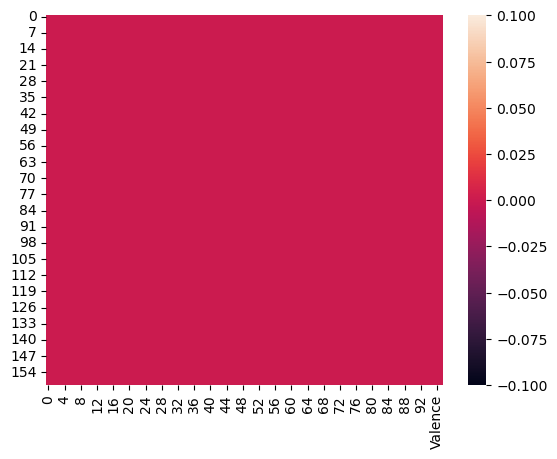

In [10]:
#Ya no existen datos nulos
totalData.isnull()
sns.heatmap(totalData.isna())

# k-NN

Importación de las librerías

In [11]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


### División de datos

In [12]:
x = totalData.iloc[:, :-2]
y = totalData.iloc[:, 96:98]

# Datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30)

In [13]:
x

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.239718,0.139201,-0.003365,-0.094386,-0.074017,-0.285636,-0.335566,0.145142,0.002124,-0.159163,...,0.371836,0.003666,-0.663144,0.902769,-0.298318,-0.325642,-0.407584,0.398354,0.250279,0.324193
1,-0.098578,0.026670,0.103224,0.106441,0.029345,0.173679,0.160801,-0.118192,-0.046173,0.073946,...,-0.000851,0.308096,0.060805,-0.056290,-0.085238,0.196436,-0.030506,-0.391325,-0.196199,-0.157996
2,0.357237,0.216536,-0.020147,-0.141264,-0.122158,-0.414290,-0.482347,0.228773,0.017037,-0.210503,...,0.222298,0.159388,-0.387562,0.183835,-0.292046,-0.204235,-0.470487,0.113448,0.279082,0.302206
3,0.002980,0.051026,0.033575,0.043446,0.005714,-0.049259,-0.048039,0.085666,0.008473,-0.097937,...,0.218251,0.164955,-0.247915,0.199474,-0.249897,-0.218154,-0.169720,0.257110,0.239160,0.244657
4,0.225952,0.325248,0.171093,0.025920,-0.082453,-0.210313,-0.261041,0.106967,-0.070199,-0.146756,...,0.048290,0.106923,-0.001407,0.385465,0.185654,-0.104524,0.277236,0.121565,0.018871,0.091230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.153143,0.054761,0.113727,0.231190,0.024728,-0.179780,0.013596,-0.243677,-0.160029,-0.289743,...,0.151505,-0.073370,0.048221,-0.024246,-0.261753,-0.042488,-0.130394,-0.168163,-0.171839,-0.101694
156,-0.416808,0.013242,0.388729,0.696510,-0.095986,-0.595338,-0.268579,-1.349137,-0.548055,-0.871668,...,0.531636,-0.578895,0.047247,0.181854,-0.499092,-1.441206,-0.023781,-0.516149,-0.285021,0.025439
157,-0.185910,0.013230,0.096731,0.310776,-0.038999,-0.201541,-0.048862,-0.391158,-0.186267,-0.307484,...,0.178256,-0.207073,0.025205,0.197028,-0.213354,-0.348560,0.006054,-0.408333,-0.071239,-0.011023
158,0.199764,0.040398,-0.207203,-0.200726,0.062127,0.227403,0.150252,0.509372,0.196520,0.353393,...,-0.286763,0.352991,-0.054454,-0.031426,0.205749,0.825504,-0.089650,0.363388,0.321538,-0.177031


In [14]:
y

,Valence,Arousal
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
155,0,0
156,0,0
157,0,1
158,0,0


In [15]:
#Determinamos el mejor valor de k(vecinos) para una mejor precisión
# Almacenar la precisión para cada valor de k en este caso probamos con valores del 1,20
accuracies = []
k_values = list(range(1, 20))
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    accuracy = knn.score(x_test, y_test)
    accuracies.append(accuracy)

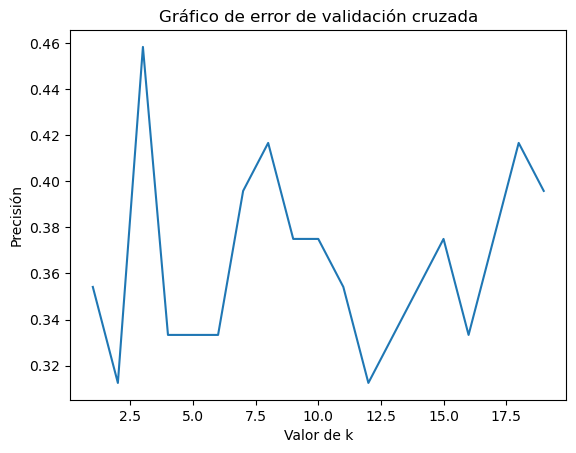

In [16]:
# Trazar el gráfico de error de validación cruzada
plt.plot(k_values, accuracies)
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.title('Gráfico de error de validación cruzada')
plt.show()

#Valor k=3 ---> mayor precisión

### Creación del modelo

In [17]:
#Determinamos el mejor valor de k(vecinos) para una mejor precisión
n_neighbors = 3

modelo_knn = KNeighborsClassifier(n_neighbors)

#Entrenamos el modelo
modelo_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Pruebas

In [18]:
#Evaluación del modelo
print('Precisión del Entrenamiento: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Precisión del Test: {:.2f}' 
     .format(knn.score(x_test, y_test)))


Precisión del Entrenamiento: 0.42
Precisión del Test: 0.40


In [19]:
#Prediccion con el modelo
y_pred = modelo_knn.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72        27
           1       0.59      0.70      0.64        23

   micro avg       0.62      0.76      0.68        50
   macro avg       0.62      0.76      0.68        50
weighted avg       0.62      0.76      0.68        50
 samples avg       0.59      0.60      0.58        50



C:\Users\Paulina Males\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Paulina Males\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Con Normalización de datos 

In [20]:
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import cross_val_score


In [21]:
x_train = minmax_scale(x_train)
y_train = minmax_scale(y_train)

In [22]:
#Determinamos el mejor valor de k(vecinos) para una mejor precisión
n_neighbors = 3

modelo_knn = KNeighborsClassifier(n_neighbors)

#Entrenamos el modelo
modelo_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
#Evaluación del modelo
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.25
Accuracy of K-NN classifier on test set: 0.40


In [24]:
#Prediccion con el modelo
y_pred = modelo_knn.predict(x_test)

#Resultado
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.48      0.50        27
           1       0.45      0.22      0.29        23

   micro avg       0.50      0.36      0.42        50
   macro avg       0.49      0.35      0.40        50
weighted avg       0.49      0.36      0.41        50
 samples avg       0.25      0.25      0.24        50



C:\Users\Paulina Males\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Paulina Males\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
